# Challenge 05
By Christian Vadillo
* Se tiene un conjunto de información y estadísticas de jugadores principiantes de basketball.
* El objetivo en sí, es predecir si un jugador principiante va a durar por lo menos 5 años en la liga de NBA.

* Es decir: 

    * y = 0 si los años jugados son menores a 5 años
    * y = 1 si los años jugados son mayores a 5 años


A continuación les dejamos el diccionario de los datos para que sepan la información de las variables:
<center><img src="https://s3.eu-west-1.amazonaws.com/eduflow-production/activity-resources-rich-text-images/940237007227498.png"></center>

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings

warnings.filterwarnings('ignore')
pd.set_option('precision', 4) 
plt.style.use('grayscale')
sns.set_style('whitegrid')


## 1. Loading data

In [2]:
df = pd.read_csv('../data/raw/nba.csv', index_col=0)
df.head().T

0                1               2            3  \
Name         Brandon Ingram  Andrew Harrison  JaKarr Sampson  Malik Sealy   
GP                       36               35              74           58   
MIN                    27.4             26.9            15.3         11.6   
PTS                     7.4              7.2             5.2          5.7   
FGM                     2.6                2               2          2.3   
FGA                     7.6              6.7             4.7          5.5   
FG%                    34.7             29.6            42.2          NaN   
3P Made                 0.5              0.7             NaN          0.1   
3PA                     2.1              NaN             1.7          0.5   
3P%                      25             23.5            24.4         22.6   
FTM                     1.6              2.6             0.9          0.9   
FTA                     2.3              3.4             1.3          1.3   
FT%                     NaN             76.5              67         68.9   
OREB                    0.7              0.5             0.5            1   
DREB                    3.4                2             1.7          0.9   
REB                     4.1              2.4             2.2          1.9   
AST                     1.9              3.7               1          0.8   
STL                     0.4              1.1             0.5          0.6   
BLK                     0.4              0.5             0.3          0.1   
TOV                     1.3              1.6               1            1   
TARGET_5Yrs               0                0               0            1   

                       4  
Name         Matt Geiger  
GP                    48  
MIN                 11.5  
PTS                  NaN  
FGM                  1.6  
FGA                    3  
FG%                 52.4  
3P Made                0  
3PA                  0.1  
3P%                    0  
FTM                  1.3  
FTA                  1.9  
FT%                 67.4  
OREB                   1  
DREB                 1.5  
REB                  2.5  
AST                  0.3  
STL                  0.3  
BLK                  0.4  
TOV                  0.8  
TARGET_5Yrs            1

## 2. EDA

### 2.1 Checking the data types

In [3]:
df.convert_dtypes().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   string 
 1   GP           1340 non-null   Int64  
 2   MIN          1340 non-null   float64
 3   PTS          1304 non-null   float64
 4   FGM          1307 non-null   float64
 5   FGA          1301 non-null   float64
 6   FG%          1295 non-null   float64
 7   3P Made      1295 non-null   float64
 8   3PA          1306 non-null   float64
 9   3P%          1282 non-null   float64
 10  FTM          1305 non-null   float64
 11  FTA          1309 non-null   float64
 12  FT%          1294 non-null   float64
 13  OREB         1295 non-null   float64
 14  DREB         1307 non-null   float64
 15  REB          1296 non-null   float64
 16  AST          1301 non-null   float64
 17  STL          1297 non-null   float64
 18  BLK          1307 non-null   float64
 19  TOV   

In [4]:
df.describe()

GP        MIN        PTS        FGM        FGA        FG%  \
count  1340.0000  1340.0000  1304.0000  1307.0000  1301.0000  1295.0000   
mean     60.4142    17.6246     6.8314     2.6269     5.8990    44.1595   
std      17.4340     8.3080     4.3648     1.6761     3.5905     6.1511   
min      11.0000     3.1000     0.7000     0.3000     0.8000    23.8000   
25%      47.0000    10.8750     3.7000     1.4000     3.3000    40.2000   
50%      63.0000    16.1000     5.6000     2.1000     4.8000    44.1000   
75%      77.0000    22.9000     8.8000     3.4000     7.6000    47.9000   
max      82.0000    40.9000    28.2000    10.2000    19.8000    73.7000   

         3P Made        3PA        3P%        FTM        FTA        FT%  \
count  1295.0000  1306.0000  1282.0000  1305.0000  1309.0000  1294.0000   
mean      0.2509     0.7878    19.4427     1.3011     1.8177    70.3526   
std       0.3871     1.0688    16.0282     0.9942     1.3189    10.5258   
min       0.0000     0.0000     0.0000     0.0000     0.0000     0.0000   
25%       0.0000     0.0000     0.0000     0.6000     0.9000    64.7250   
50%       0.1000     0.3000    22.5500     1.0000     1.5000    71.3000   
75%       0.4000     1.2000    32.6000     1.6000     2.3000    77.6000   
max       2.3000     6.5000   100.0000     7.7000    10.2000   100.0000   

            OREB       DREB        REB        AST        STL        BLK  \
count  1295.0000  1307.0000  1296.0000  1301.0000  1297.0000  1307.0000   
mean      1.0093     2.0290     3.0354     1.5345     0.6221     0.3684   
std       0.7748     1.3491     2.0538     1.4293     0.4119     0.4280   
min       0.0000     0.2000     0.3000     0.0000     0.0000     0.0000   
25%       0.4000     1.0000     1.5000     0.6000     0.3000     0.1000   
50%       0.8000     1.7000     2.5000     1.1000     0.5000     0.2000   
75%       1.4000     2.6000     4.0000     2.0000     0.8000     0.5000   
max       5.3000     9.6000    13.9000     9.3000     2.5000     3.9000   

             TOV  TARGET_5Yrs  
count  1299.0000    1340.0000  
mean      1.1948       0.6201  
std       0.7230       0.4855  
min       0.1000       0.0000  
25%       0.7000       0.0000  
50%       1.0000       1.0000  
75%       1.5000       1.0000  
max       4.4000       1.0000

We have 20 numeric columns and 1 string column. All numeric are continous except for the target column (TARGET_5Yrs) which is categorical

## 2.2 Exploring the data

### 2.2.1 Distribution plots

In [5]:
num_cols = df.select_dtypes('number').columns[:-1]  # -1 for deleting target column

In [6]:
num_cols

Index(['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM',
       'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV'],
      dtype='object')

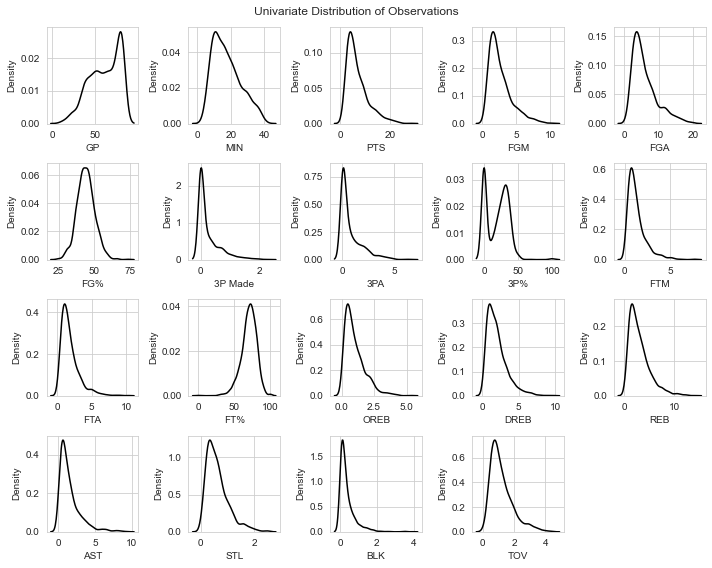

In [7]:
fig, axs = plt.subplots(4, 5, sharex=False, sharey=False, figsize=(10,8))
axs = axs.ravel()  # To get a flattened array

for i, c in enumerate(num_cols):
    sns.distplot(df[c], hist=False, ax=axs[i])
    
fig.delaxes(axs[-1])  # Remove empty figure
fig.suptitle('Univariate Distribution of Observations')
plt.tight_layout()
plt.show()

We can see that most of the variables are right-skewed. We might try a log-transformation to get rid of the skewness and see if that helps the classifiers

### 2.2.2 Boxplots to explore possible outliers

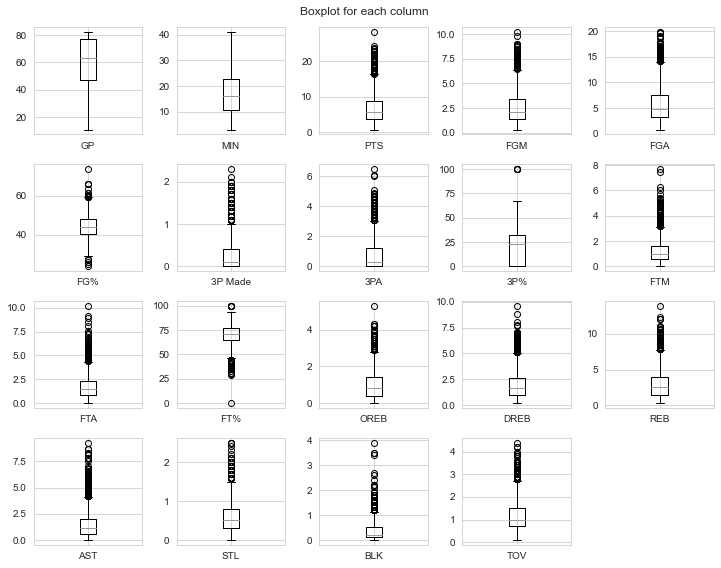

In [8]:
fig, axs = plt.subplots(4, 5, sharex=False, sharey=False, figsize=(10,8))
axs = axs.ravel()  # To get a flattened array

for i, c in enumerate(num_cols):
    df.boxplot(column=c, ax=axs[i])
    
fig.delaxes(axs[-1])  # Remove empty figure
fig.suptitle('Boxplot for each column')
plt.tight_layout()
plt.show()

### 2.2.4 Correlations

<AxesSubplot:>

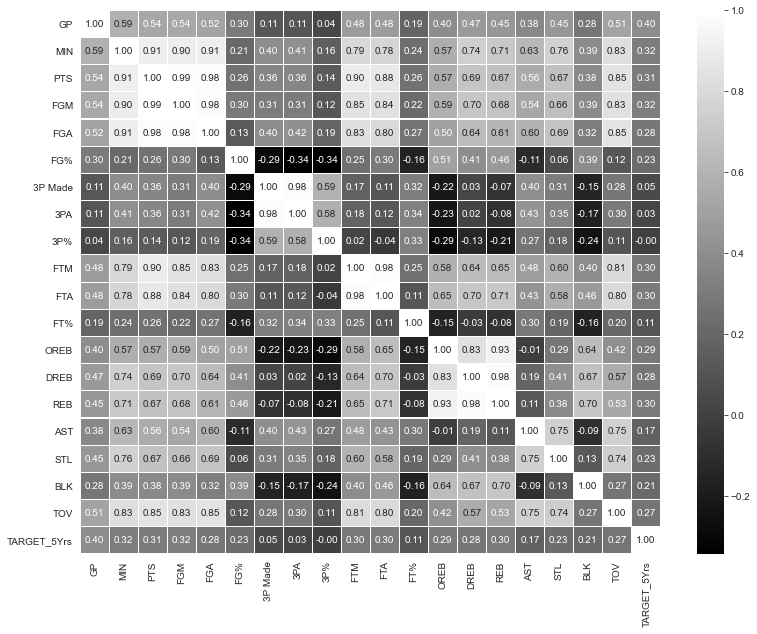

In [9]:
fig = plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),
            cmap='gray',
            linewidths=0.1,
            annot=True, 
            fmt='0.2f')

Looks like there are a couple of variables that are strongly correlated. In particular, 'MIN' which stands for minutes played have several correlations. Which it is logical, the more minutes a player play more assists, blocks or goals will have. 

For the target variable, looks like that there are not big correlations with the features

### 2.2.5 Target column

In [10]:
pcts = df['TARGET_5Yrs'].value_counts(normalize=True, sort=False).values
pcts

array([0.37985075, 0.62014925])

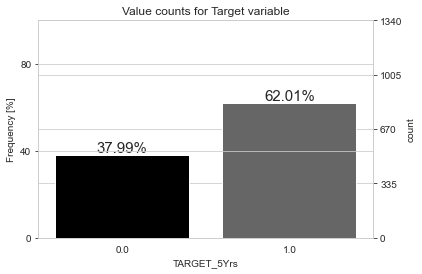

In [11]:
# src: https://stackoverflow.com/a/33259038
import matplotlib.ticker as ticker

plt.figure(figsize=(6, 4))

ax = sns.countplot(df['TARGET_5Yrs'])
# Make twin axis
ax2 = ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for i, p in enumerate(ax.patches):
    x=p.get_bbox().get_points()[:, 0]
    y=p.get_bbox().get_points()[1, 1]
    ax.annotate('{:.2f}%'.format(pcts[i]*100), (x.mean(), y), 
            ha='center', va='bottom', size=15) # set the alignment of the text
    
# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(5))
# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,len(df))
# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(40))
plt.title('Value counts for Target variable');
plt.show()

Looks like we have a unbalanced target variable. We might need to take it into account for the modeling process

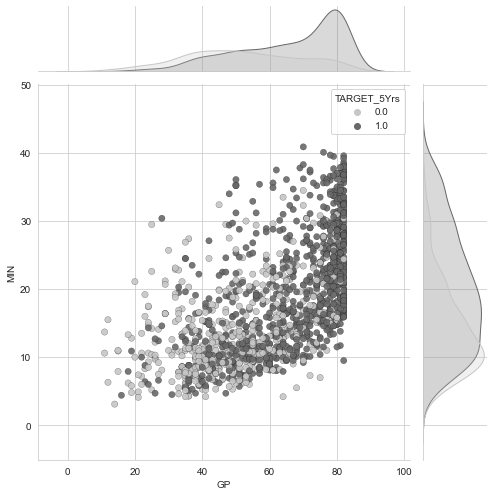

In [12]:
sns.jointplot(x='GP', y='MIN', data=df, hue='TARGET_5Yrs', palette='Greys',
              edgecolor='black', linewidth=0.2, height=7,
              joint_kws = {'s': 40, 'alpha': 0.9})

## 2.3 Missing values?

In [13]:
df.isnull().sum() / len(df) * 100

Name           0.0000
GP             0.0000
MIN            0.0000
PTS            2.6866
FGM            2.4627
FGA            2.9104
FG%            3.3582
3P Made        3.3582
3PA            2.5373
3P%            4.3284
FTM            2.6119
FTA            2.3134
FT%            3.4328
OREB           3.3582
DREB           2.4627
REB            3.2836
AST            2.9104
STL            3.2090
BLK            2.4627
TOV            3.0597
TARGET_5Yrs    0.0000
dtype: float64

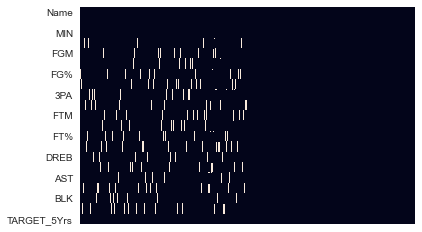

In [14]:
sns.heatmap(df.isnull().T, cbar=False, xticklabels=False);

There are missing values in almost every column, however the percentage with respect to total samples it is low. We can try two approaches and see which gives us a better result: 
* First, we can replace these missing values using the median of each column. 
* Second, we can drop the rows with missing values.

Another interesting behaviour is that the missing values are only present in the first half of the dataset.

## 2.4 Players names exploration

In [15]:
df['Name'].value_counts()[:30]

Charles Smith       9
Charles Jones       6
Dee Brown           4
Michael Smith       4
Mark Davis          4
Jeff Taylor         2
Mark Bryant         2
Michael Anderson    2
Gerald Henderson    2
Glen Rice           2
Eddie Johnson       2
Walker Russell      2
Larry Johnson       2
Ken Johnson         2
Bobby Jones         2
Carlos Rogers       2
Cory Alexander      2
Bob Martin          2
James Johnson       2
Marcus Williams     2
Tim Hardaway        2
Cedric Henderson    2
David Lee           2
Mike Dunleavy       2
Reggie Williams     2
Chris Smith         2
Larry Drew          2
Glenn Robinson      2
Jamie Feick         2
Donell Taylor       1
Name: Name, dtype: int64

In [16]:
df.query("Name == 'Charles Smith'").T

162            163            164            165  \
Name         Charles Smith  Charles Smith  Charles Smith  Charles Smith   
GP                      60             60             60             71   
MIN                    8.7            8.7            8.7           30.4   
PTS                    NaN            2.9            2.9           16.3   
FGM                      1              1              1            6.1   
FGA                    2.2            2.2            NaN           12.4   
FG%                   44.4           44.4           44.4           49.5   
3P Made                  0              0              0              0   
3PA                    0.1            NaN            0.1              0   
3P%                      0              0              0              0   
FTM                    0.9            0.9            0.9              4   
FTA                    1.3            1.3            1.3            5.5   
FT%                   69.7           69.7           69.7            NaN   
OREB                   0.2            0.2            0.2            2.4   
DREB                   0.9            0.9            0.9            4.1   
REB                    1.2            1.2            1.2            6.5   
AST                    1.7            1.7            1.7            1.5   
STL                    0.6            0.6            0.6              1   
BLK                    0.1            0.1            0.1            1.3   
TOV                    0.6            0.6            0.6            2.1   
TARGET_5Yrs              1              1              0              1   

                       166            167            168            169  \
Name         Charles Smith  Charles Smith  Charles Smith  Charles Smith   
GP                      71             71             34             34   
MIN                   30.4           30.4            8.6            8.6   
PTS                   16.3           16.3            3.5            3.5   
FGM                    6.1            6.1            1.4            1.4   
FGA                   12.4           12.4            3.7            3.7   
FG%                   49.5           49.5            NaN           39.2   
3P Made                NaN              0            0.4            0.4   
3PA                      0              0            1.4            1.4   
3P%                      0              0           31.9           31.9   
FTM                      4              4            0.2            0.2   
FTA                    5.5            NaN            0.3            0.3   
FT%                   72.5           72.5           54.5           54.5   
OREB                   2.4            2.4            0.4            0.4   
DREB                   4.1            4.1            0.4            0.4   
REB                    6.5            6.5            0.8            NaN   
AST                    1.5            1.5            0.6            0.6   
STL                      1              1            0.3            0.3   
BLK                    1.3            1.3            0.2            0.2   
TOV                    2.1            2.1            0.8            0.8   
TARGET_5Yrs              1              0              1              1   

                       170  
Name         Charles Smith  
GP                      34  
MIN                    8.6  
PTS                    3.5  
FGM                    1.4  
FGA                    3.7  
FG%                   39.2  
3P Made                0.4  
3PA                    1.4  
3P%                   31.9  
FTM                    0.2  
FTA                    0.3  
FT%                   54.5  
OREB                   0.4  
DREB                   0.4  
REB                    NaN  
AST                    0.6  
STL                    0.3  
BLK                    0.2  
TOV                    0.8  
TARGET_5Yrs              0

In [17]:
df.query("Name == 'Charles Jones'").T

364            365            366            367  \
Name         Charles Jones  Charles Jones  Charles Jones  Charles Jones   
GP                      78             78             78             29   
MIN                   20.1           20.1           20.1           16.4   
PTS                    8.4            8.4            8.4            3.7   
FGM                      3              3              3            1.3   
FGA                    5.8            5.8            5.8            4.2   
FG%                     52             52             52           31.7   
3P Made                  0              0              0            0.7   
3PA                    NaN            0.1            0.1            2.1   
3P%                      0              0              0           31.1   
FTM                    2.3            2.3            NaN            0.4   
FTA                    3.6            3.6            3.6            NaN   
FT%                   64.8           64.8           64.8             50   
OREB                   1.8            1.8            1.8            0.3   
DREB                   3.3            3.3            3.3            1.1   
REB                    5.1            5.1            5.1            1.4   
AST                    1.6            1.6            1.6            1.4   
STL                    0.6            NaN            0.6            0.6   
BLK                    0.8            0.8            0.8            0.2   
TOV                    1.8            1.8            1.8              1   
TARGET_5Yrs              1              0              0              1   

                       368            369  
Name         Charles Jones  Charles Jones  
GP                      29             29  
MIN                   16.4           16.4  
PTS                    3.7            3.7  
FGM                    1.3            1.3  
FGA                    4.2            4.2  
FG%                   31.7           31.7  
3P Made                0.7            0.7  
3PA                    NaN            2.1  
3P%                   31.1           31.1  
FTM                    0.4            0.4  
FTA                    0.8            0.8  
FT%                     50             50  
OREB                   0.3            0.3  
DREB                   1.1            1.1  
REB                    1.4            1.4  
AST                    1.4            NaN  
STL                    0.6            0.6  
BLK                    0.2            0.2  
TOV                      1              1  
TARGET_5Yrs              0              0

In [18]:
df.query("Name == 'Gerald Henderson'").T

732               733
Name         Gerald Henderson  Gerald Henderson
GP                         43                43
MIN                       8.3               8.3
PTS                       2.6               2.6
FGM                       0.9               0.9
FGA                       2.4               2.4
FG%                      35.6              35.6
3P Made                   0.1               0.1
3PA                       0.4               0.4
3P%                      21.1              21.1
FTM                       0.8               0.8
FTA                       1.1               1.1
FT%                      74.5              74.5
OREB                      0.3               0.3
DREB                      0.9               0.9
REB                       1.3               1.3
AST                       0.3               0.3
STL                       0.2               0.2
BLK                       0.2               0.2
TOV                       0.3               0.3
TARGET_5Yrs                 1                 1

We've found that there are players that appear more than one time. In other words we have repeated data.

## 3. Data Pre processing

### 3.1 Imputing missing values 

Our first approach will be fill the missing values with the median of each column

In [19]:
df.fillna(value=df.median(), inplace=True)

In [20]:
df.isnull().sum()

Name           0
GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64

### 3.2 Deleting repeated samples

In [21]:
df['Name'].value_counts()

Charles Smith               9
Charles Jones               6
Dee Brown                   4
Michael Smith               4
Mark Davis                  4
                           ..
Kentavious Caldwell-Pope    1
Jerrod Mustaf               1
Alex Bradley                1
Ray Allen                   1
Nick Young                  1
Name: Name, Length: 1294, dtype: int64

We might need to perform a more deeper analysis to decide which instance to keep. But for now, we are going to take a simple approach and keep just the first instance of each repeated player

In [22]:
df.drop_duplicates('Name', keep='first', inplace=True)

In [23]:
df['Name'].value_counts()

Oliver Miller       1
Cedric Henderson    1
Keith Askins        1
Darnell Mee         1
Kevin Burleson      1
                   ..
Mason Plumlee       1
Frank Kornet        1
Randy Woods         1
Matt Carroll        1
Nick Young          1
Name: Name, Length: 1294, dtype: int64

## 4. Feature Engineering

### 4.1 "Four Factors of Basketball Success"
https://www.basketball-reference.com/about/factors.html

In [24]:
def eFG_rate(p):
    """ Effective Field Goal Percentage (eFG%). 
    The formula for both offense and defense is 
    (FGM + 0.5 * 3PM) / FGA
    """
    return (p['FGM'] + 0.5 * p['3P Made']) / p['FGA']


def TOV_rate(p):
    """ Turnover Percentage (TOV%).
    The formula for both offense and defense is
    TOV / (FGA + 0.44 * FTA + TOV). 
    """
    return p['TOV'] / (p['FGA'] + 0.44 * p['FTA'] + p['TOV']) 


def FTA_rate(p):
    """ The free throw factor is a measure of both how often 
    a team gets to the line and how often they make them. 
    The formula for both offense and defense is FT / FGA
    """
    return p['FTA'] / p['FGA'] 


def TS_rate(p):
    """True Shooting Percentage"""
    return p['PTS'] / (2 * (p['FGA'] + 0.44 * p['FTA']))


def AST_rate(p):
    """Assist Ratio - the percentage of a player's
    possessions that ends in an assist. 
    Assist Ratio = (Assists x 100) divided 
    by [(FGA + (FTA x 0.44) + Assists + Turnovers]"""
    return (p['AST'] * 100) / (p['FGA'] + p['FTA'] * 0.44 + p['AST'] + p['TOV'])

                            
df['eFG%'] = df.apply(eFG_rate, axis=1)
df['TOV%'] = df.apply(TOV_rate, axis=1)
df['FTA%'] = df.apply(FTA_rate, axis=1)
df['TS%'] = df.apply(TS_rate, axis=1)
df['AST%'] = df.apply(AST_rate, axis=1)



### 4.2 Transforming features to a normal distribution

In [25]:
num_cols = num_cols.tolist() + ['eFG%', 'TOV%', 'FTA%', 'TS%', 'AST%']

### Quantile Transforms

A quantile transform will map a variable’s probability distribution to another probability distribution.

Also called a percent-point function (PPF), is the inverse of the cumulative probability distribution (CDF). A CDF is a function that returns the probability of a value at or below a given value. The PPF is the inverse of this function and returns the value at or below a given probability.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html#sklearn.preprocessing.QuantileTransformer

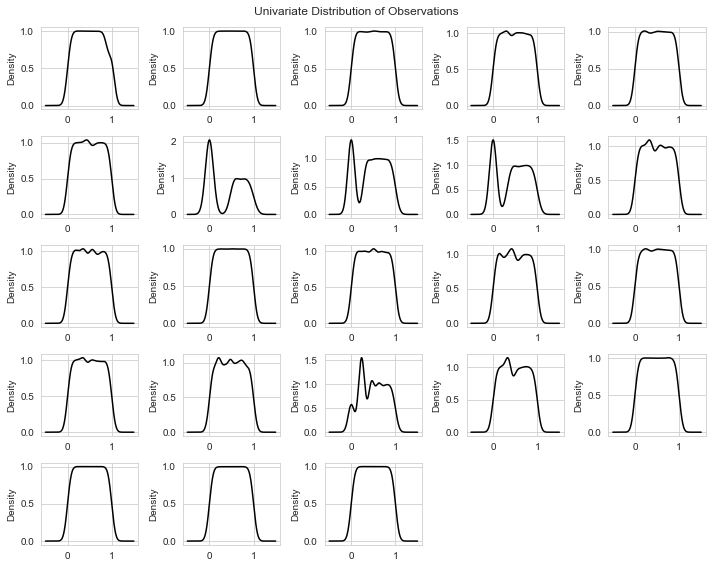

In [26]:
from sklearn.preprocessing import QuantileTransformer
quantile = QuantileTransformer(output_distribution='uniform')
df[num_cols] = quantile.fit_transform(df[num_cols])


fig, axs = plt.subplots(5, 5, sharex=False, sharey=False, figsize=(10,8))
axs = axs.ravel()  # To get a flattened array

for i, c in enumerate(num_cols):
    df[c].plot.kde(ax=axs[i])

[fig.delaxes(ax) for ax in axs[-2:]] # Remove empty figure
fig.suptitle('Univariate Distribution of Observations')
plt.tight_layout()
plt.show()


### Box-Cox power transformation
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html

In [27]:
# from scipy.stats import boxcox
# fig, axs = plt.subplots(5, 5, sharex=False, sharey=False, figsize=(10,8))
# axs = axs.ravel()  # To get a flattened array

# for i, c in enumerate(num_cols):
#     df[c] = np.exp(df[c])
#     # power transform
#     df[c] = boxcox(df[c])[0]
#     sns.distplot(df[c], hist=False, ax=axs[i])
    
# [fig.delaxes(ax) for ax in axs[-2:]] # Remove empty figure
# fig.suptitle('Univariate Distribution of Observations')
# plt.tight_layout()
# plt.show()


### 4.3 Dropping unuseful columns

* REB column is the sum of OREB and DREB, since there is repeated information, we can drop REB column.
* Name column doesn't look useful so we are going to drop it too.

In [28]:
# df.drop(['Name','REB'], axis=1, inplace=True)
df.drop('Name', axis=1, inplace=True)
df.head()

GP     MIN     PTS     FGM     FGA     FG%  3P Made     3PA     3P%  \
0  0.0946  0.8478  0.6667  0.6096  0.7603  0.0450   0.8113  0.8754  0.5661   
1  0.0791  0.8388  0.6542  0.4439  0.6897  0.0085   0.8724  0.5050  0.5350   
2  0.6812  0.4645  0.4399  0.4439  0.4650  0.3684   0.5490  0.8248  0.5475   
3  0.4294  0.2928  0.5320  0.5526  0.5941  0.4855   0.5490  0.6006  0.5203   
4  0.2653  0.2858  0.5045  0.3048  0.1892  0.9094   0.0000  0.3328  0.0000   

      FTM  ...     AST     STL     BLK     TOV  TARGET_5Yrs    eFG%    TOV%  \
0  0.7452  ...  0.7412  0.3458  0.7062  0.6687          0.0  0.0786  0.3179   
1  0.9074  ...  0.9219  0.8814  0.7698  0.7798          0.0  0.0471  0.6231   
2  0.3819  ...  0.4595  0.4710  0.6071  0.4990          0.0  0.3033  0.5955   
3  0.3819  ...  0.3729  0.5866  0.2342  0.4990          1.0  0.2573  0.4167   
4  0.6236  ...  0.0916  0.2152  0.7062  0.3378          1.0  0.8859  0.6867   

     FTA%     TS%    AST%  
0  0.5090  0.1021  0.6457  
1  0.8949  0.1310  0.8894  
2  0.4294  0.4318  0.5468  
3  0.3123  0.2572  0.3286  
4  0.9721  0.9850  0.0920  

[5 rows x 25 columns]

## 5. Modeling

First, we are going to test the following models without any hyperparameter tuning:
* DummyModel
* LightGBM 
* Decision Tree Classifier
* Random Forest Classifier
* Naive Bayes
* Logistic Regression
* Support Vector Machine

In [29]:
# Models
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [30]:
# Support libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA

import plotly.graph_objects as go
import plotly.express as px

# Metrics
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import make_scorer, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
# For Reproducibility
import os
import random
# Set seed for reproducability
SEED = 88
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
np.random.RandomState(SEED);

### 4.1 Splitting the data

In [32]:
X = df.drop('TARGET_5Yrs', axis=1).values
y = df['TARGET_5Yrs'].values

We use 'stratify' since we a small presence of unbalanced data for the target. This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable Y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=Y will make sure that your random split has 25% of 0's and 75% of 1's.

In [33]:
X_train, X_test, y_train, y_test =\
        train_test_split(X, y, test_size=0.2, stratify=y)

In [34]:
X_train

array([[0.23573574, 0.46446446, 0.36536537, ..., 0.6976977 , 0.21331793,
        0.45956851],
       [0.42942943, 0.28578579, 0.18968969, ..., 0.95295295, 0.94794795,
        0.08593789],
       [0.41741742, 0.17267267, 0.17367367, ..., 0.80730731, 0.33483483,
        0.25294839],
       ...,
       [0.12062062, 0.3993994 , 0.59309309, ..., 0.37274369, 0.4458524 ,
        0.33925193],
       [0.03203203, 0.40790791, 0.24074074, ..., 0.02902903, 0.24102499,
        0.54883812],
       [1.        , 0.93593594, 0.94794795, ..., 0.26689369, 0.30933749,
        0.82124382]])

### 4.2 Defining the evaluation metrics

For evaluation of the models we are going to perform a cross-validation using *cross_validate* and *StratifiedKFold* to avoid biased evaluation. The metrics to use will be:
* Accuracy
* F1-Score
* ROC-AUC
* PR-AUC

Since we have a small presence of unbalanced data, additional to Accuracy and ROC-AUC metric we are going to use F1-Score and PR-AUC, which are ideal for this kind of cases


In [35]:
from functools import partial

def display_scores(scores, metric):
    """ Display the avg and std score of the model"""
    print('='*60)
    for m in metric:
        name = 'test_'+m.lower()
        print(f"Metric: {m:>10} {'|':>5} Mean: {scores[name].mean():.3f} {'|':>5} STD: {scores[name].std():.3f}")


def plot_boxplot(scores, metric, ax=None):
    """ Plot the boxplot of each model given a metric"""
    data = [model[metric] for model in scores]
    name = metric.split('_')[1]
    if ax:
        ax.boxplot(data, labels=names, showmeans=True)
        ax.set_title(f'{name.capitalize()} by model')
        ax.set_xlabel('Model')
        ax.set_ylabel(name.capitalize())
    else:
        plt.boxplot(data, labels=names, showmeans=True)
        plt.set_title(f'{name.capitalize()} by model')
        plt.set_xlabel('Model')
        plt.set_ylabel(name.capitalize())
        plt.show()

        
def roc_auc(y_true, probs_pred):
    """ Calculate ROC area under curve """
    return roc_auc_score(y_true, probs_pred)


def pr_auc(y_true, probs_pred):
    """Calculate precision-recall area under curve"""
    # calculate area under curve
    return average_precision_score(y_true, probs_pred)


def evaluate_model(model, x, y):
    """ Evaluate the model using Stratified KFold """
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)
    
    scoring = {'accuracy': make_scorer(accuracy_score),
               'f1': make_scorer(f1_score), 
               'roc_auc': make_scorer(roc_auc, needs_proba=True),
               'pr_auc': make_scorer(pr_auc, needs_proba=True)
              }
    
    scores = cross_validate(model, x, y, cv=cv, 
                            scoring=scoring,
                            n_jobs=-1, 
                            verbose=0)
    return scores

# Partial functions allow one to derive a function with x parameters to a
# function with fewer parameters and fixed values set for the more limited function.
evaluate_model = partial(evaluate_model, x=X_train, y=y_train)
display_scores = partial(display_scores, metric=['accuracy', 'f1', 'roc_auc', 'pr_auc'])

### 4.3 Feature selection

In [36]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, RFE

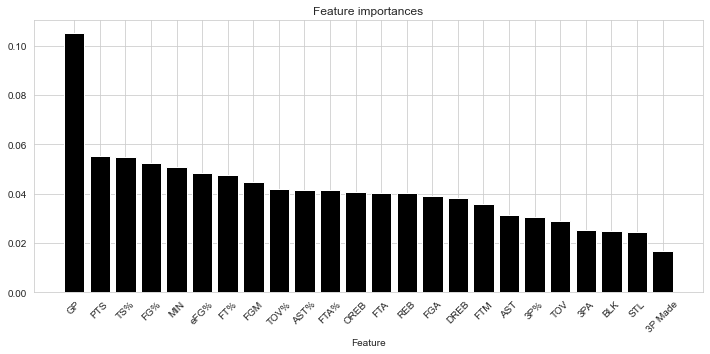

In [37]:
pipe = Pipeline(steps=[('s', MinMaxScaler()), ('RF', RandomForestClassifier())])
pipe.fit(X, y)
sorted_indices = np.argsort(pipe.steps[1][1].feature_importances_)[::-1]
sorted_names, sorted_vals = [],[]
for i in sorted_indices:
    sorted_names.append(num_cols[i])
    sorted_vals.append(pipe.steps[1][1].feature_importances_[i])

plt.figure(figsize=(12,5))
plt.bar(sorted_names,sorted_vals)
plt.xticks(rotation=45);
plt.xlabel("Feature")
plt.title("Feature importances");

In [38]:
# from sklearn.feature_selection import SelectKBest, chi2, f_classif, RFE
# pipe = Pipeline(steps=[('s', MinMaxScaler()), ('KB', SelectKBest(f_classif))])
# pipe.fit(X, y)
# sorted_indices = np.argsort(pipe.steps[1][1].scores_)[::-1]
# sorted_names, sorted_vals = [],[]
# for i in sorted_indices:
#     sorted_names.append(num_cols[i])
#     sorted_vals.append(pipe.steps[1][1].scores_[i])

# plt.figure(figsize=(12,5))
# plt.bar(sorted_names,sorted_vals)
# plt.xticks(rotation=45);
# plt.xlabel("Feature")
# plt.title("Feature importances");

In [39]:
# X_new = SelectKBest(chi2, k=12).fit_transform(X, y)

X_new = df[sorted_names[:13]]

X_train, X_test, y_train, y_test =\
        train_test_split(X, y, test_size=0.2, stratify=y)

### 4.3 Testing default models

In [40]:
def get_model(scaler):
    """ Generator for the models """
    # This classifier is useful as a simple baseline to compare with other (real) classifiers
    base_p = Pipeline(steps=[('s', scaler), ('BASE', DummyClassifier())])
    lgbm_p = Pipeline(steps=[('s', scaler), ('LGBM', LGBMClassifier())])  
    xgb_p  = Pipeline(steps=[('s', scaler), ('XGB', XGBClassifier())])
    dt_p   = Pipeline(steps=[('s', scaler), ('DT', DecisionTreeClassifier())])
    rf_p   = Pipeline(steps=[('s', scaler), ('RF', RandomForestClassifier())])
    nb_p   = Pipeline(steps=[('s', scaler), ('NB', GaussianNB())])
    lr_p   = Pipeline(steps=[('s', scaler), ('LR', LogisticRegression())])
    svc_p  = Pipeline(steps=[('s', scaler), ('SVM', SVC(probability=True))])
    
    models = [base_p, lgbm_p, xgb_p, dt_p, 
              rf_p, nb_p, lr_p, svc_p]
    names = 'BASE LGBM XGB DT RF NB LR SVM'.split(' ')

    for n, m in zip(names, models):
        yield n, m

In [41]:
scores_all, names = [], []
for name, model in get_model(scaler=MinMaxScaler()):
    print('-'*20)
    print(name)
    scores = evaluate_model(model)
    scores_all.append(scores)
    names.append(name)
    display_scores(scores)
    

--------------------
BASE
Metric:   accuracy     | Mean: 0.493     | STD: 0.042
Metric:         f1     | Mean: 0.596     | STD: 0.038
Metric:    roc_auc     | Mean: 0.507     | STD: 0.049
Metric:     pr_auc     | Mean: 0.628     | STD: 0.024
--------------------
LGBM
Metric:   accuracy     | Mean: 0.704     | STD: 0.036
Metric:         f1     | Mean: 0.772     | STD: 0.032
Metric:    roc_auc     | Mean: 0.744     | STD: 0.030
Metric:     pr_auc     | Mean: 0.816     | STD: 0.019
--------------------
XGB
Metric:   accuracy     | Mean: 0.686     | STD: 0.034
Metric:         f1     | Mean: 0.758     | STD: 0.029
Metric:    roc_auc     | Mean: 0.733     | STD: 0.034
Metric:     pr_auc     | Mean: 0.815     | STD: 0.024
--------------------
DT
Metric:   accuracy     | Mean: 0.619     | STD: 0.033
Metric:         f1     | Mean: 0.694     | STD: 0.034
Metric:    roc_auc     | Mean: 0.594     | STD: 0.032
Metric:     pr_auc     | Mean: 0.673     | STD: 0.019
--------------------
RF
Metric:   a

#### Visualizing the results

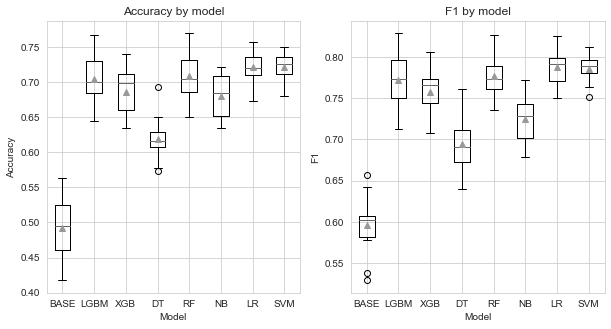

In [42]:
fig, axs = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(10,5))
axs = axs.ravel()  # To get a flattened array

for i, m in enumerate(['test_accuracy', 'test_f1']):
    plot_boxplot(scores_all, m, axs[i])

#### ROC Curves for each model

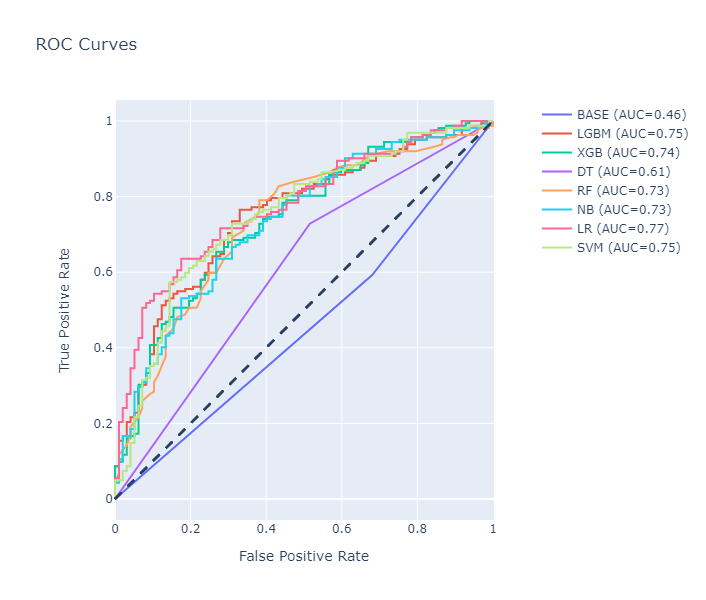

In [43]:
fig = go.Figure()
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

for i, (name, model_) in enumerate(get_model(scaler=RobustScaler())):
    model_.fit(X_train, y_train)
    probs = model_.predict_proba(X_test)[:, 1]
    # PR_Curves
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc_score = roc_auc(y_test, probs)
    name = f"{name} (AUC={auc_score:.2f})"
    fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))

    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )

fig.update_layout(
    title=f'ROC Curves',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    yaxis=dict(scaleanchor="x", scaleratio=1),
    xaxis=dict(constrain='domain'),
    width=600, height=600
)
fig.show()

#### Precision-Recall Curves for each model

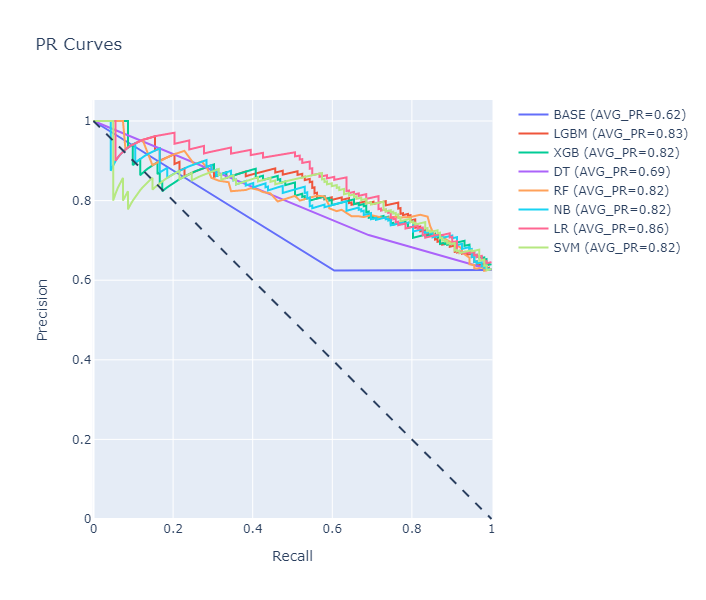

In [44]:
# PR-Curve Plot

fig = go.Figure()
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=1, y1=0
)


for i, (name, model_) in enumerate(get_model(scaler=RobustScaler())):
    model_.fit(X_train, y_train)
    probs = model_.predict_proba(X_test)[:, 1]
    # PR_Curves
    pr_, rc_, _ = precision_recall_curve(y_test, probs)
    auc_score = average_precision_score(y_test, probs)
    name = f"{name} (AVG_PR={auc_score:.2f})"     
    fig.add_trace(go.Scatter(x=rc_, y=pr_,
                             name=name,
                             mode='lines'))

fig.update_layout(
    title=f'PR Curves',
    xaxis_title='Recall',
    yaxis_title='Precision',
    yaxis=dict(scaleanchor="x", scaleratio=1),
    xaxis=dict(constrain='domain'),
    width=600, height=600
)
fig.show()  

The first iteration shows us that Logistic Regression gives us the best Accuracy, F1, ROC-AUC y PR-AUC. However LightGBM, Random Forest and SVM performed well too

The next step is to try get a better perform by tuning their hyperparameters. For this we are going to use Optuna.

## 5. Hyperparameter tuning with Optuna
Optuna is an automatic hyperparameter optimization software framework, particularly designed for machine learning. It features an imperative, define-by-run style user AP

Optuna uses Tree-structured Parzen Estimater (TPE), which is a form of Bayesian Optimization to search more efficiently than a random search, by choosing points closer to previous good results.

First, we need to define our objective function that we want to optimize. Lets try accuracy


In [45]:
import optuna
# pr_metric = make_scorer(pr_auc, needs_proba=True)
accuracy_metric = make_scorer(accuracy_score)
# To hide the log
optuna.logging.set_verbosity(optuna.logging.WARNING)  # default .INFO


### 5.1 Optimizing Random Forest

In [46]:
def objective(trial, scaler, metric, cv=5):
    # Hyperparameters space #
    n_estimators = trial.suggest_int('n_estimators', 200, 800)
    max_depth = trial.suggest_int('max_depth', 1, 50)
#     criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 4, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 20, 30)
    max_samples = trial.suggest_uniform('max_samples', 0.6, 0.99)
#     max_features = trial.suggest_categorical('max_features', ['auto', 'log2'])
#     max_features = trial.suggest_uniform('max_features', 0.6, 1.0)
    max_features = trial.suggest_int('max_features', 1, X_new.shape[1])
    
    ########################
    # PCA
#     n_components = trial.suggest_int('n_components', 6, 18)
    ########################

    # Pipeline to optimize #
    pipeline = Pipeline([
        ('sc', scaler),
#         ('pca', PCA(n_components=n_components)),
        ('clf', RandomForestClassifier(n_estimators=n_estimators,
                                      max_features=max_features,
                                      max_depth=max_depth,
                                      criterion='entropy',
                                      min_samples_leaf=min_samples_leaf,
                                      min_samples_split=min_samples_split,
                                      max_samples=max_samples,
                                      n_jobs=-1
                                      ))])
    pipeline.fit(X_train, y_train)
    return pipeline.score(X_test, y_test)   

#     return cross_val_score(pipeline, 
#                             X_train, y_train,
#                             cv=cv, n_jobs=-1,
#                             scoring=metric).mean()


if 'study_rf_acc_trans.pkl' in os.listdir():
    study = joblib.load('study_rf_acc_trans.pkl')
else:
    print("Running...")
    scaler = RobustScaler()
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=SEED)
    study = optuna.create_study(direction='maximize')
    
    study.optimize(lambda trial: objective(trial, scaler,
                                           accuracy_metric, cv),
                   n_trials=200)

trial = study.best_trial
print("Done.")
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

# Save the study for later
# joblib.dump(study, 'study_rf_acc_trans.pkl')

Running...
Done.
Accuracy: 0.7335907335907336
Best hyperparameters: {'n_estimators': 482, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 20, 'max_samples': 0.776781408382424, 'max_features': 10}


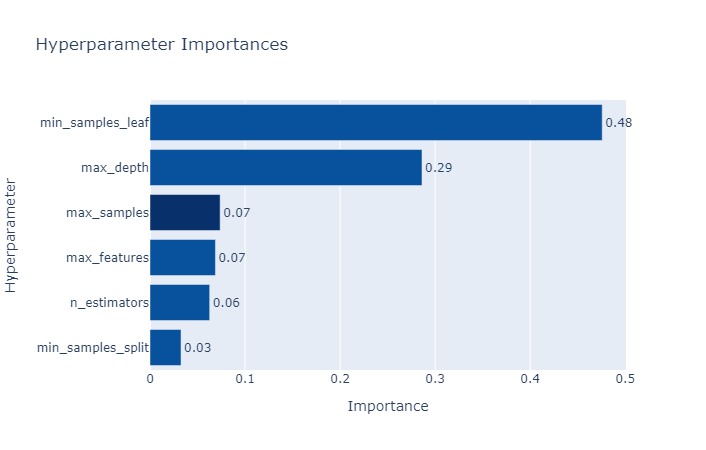

In [47]:
optuna.visualization.plot_param_importances(study)

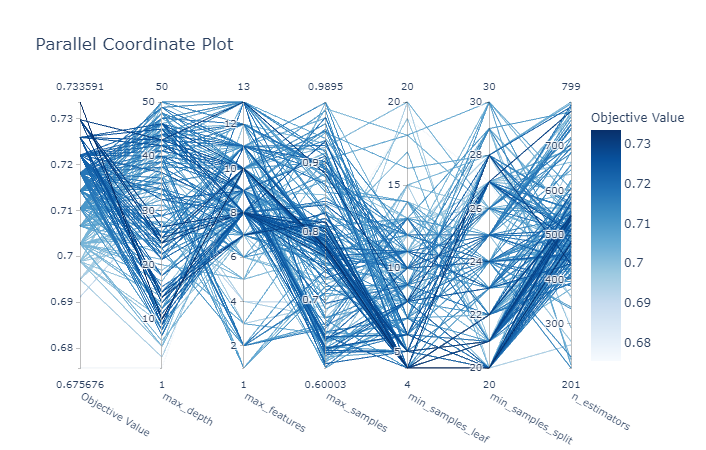

In [48]:
optuna.visualization.plot_parallel_coordinate(study)

#### Evaluating the optimized model

In [49]:
params = study.best_params.copy()
params

{'n_estimators': 482,
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 20,
 'max_samples': 0.776781408382424,
 'max_features': 10}

In [50]:
best_rf = Pipeline(
    [('sc', RobustScaler()), 
#      ('pca', PCA(params.pop('n_components'))),
     ('rf', RandomForestClassifier(**params))])

# Cross-Validation
scores = evaluate_model(best_rf, x=X_test, y=y_test)
display_scores(scores)

best_rf.fit(X_train, y_train)
print('-'*10)
print(classification_report(best_rf.predict(X_test), y_test))
print('-'*10)
print(confusion_matrix(best_rf.predict(X_test), y_test))

Metric:   accuracy     | Mean: 0.683     | STD: 0.103
Metric:         f1     | Mean: 0.758     | STD: 0.078
Metric:    roc_auc     | Mean: 0.760     | STD: 0.088
Metric:     pr_auc     | Mean: 0.847     | STD: 0.059
----------
              precision    recall  f1-score   support

         0.0       0.51      0.64      0.57        76
         1.0       0.83      0.74      0.78       183

    accuracy                           0.71       259
   macro avg       0.67      0.69      0.67       259
weighted avg       0.74      0.71      0.72       259

----------
[[ 49  27]
 [ 48 135]]


### 5.2 Optimizing LightGBM

In [51]:
# import lightgbm as lgb
# # optuna.logging.set_verbosity(optuna.logging.WARNING)  # default .INFO
# def objective(trial):
#     dtrain = lgb.Dataset(X_train, label=y_train)
#     dvalid = lgb.Dataset(X_test, label=y_test)

#     param = {
#         "objective": "binary",
#         "metric": "auc",
#         "verbosity": -1,
#         "boosting_type": "dart",
#         "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
#         "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
#         "num_leaves": trial.suggest_int("num_leaves", 2, 256),
#         "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
#         "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
#         "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
#         "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
#     }

#     # Add a callback for pruning.
#     pruning_callback = optuna.integration.LightGBMPruningCallback(trial, "auc")
#     gbm = lgb.train(
#         param, dtrain,
#         valid_sets=[dvalid],
#         verbose_eval=False,
#         callbacks=[pruning_callback]
#     )

#     preds = gbm.predict(X_test)
#     pred_labels = np.rint(preds)
#     accuracy = accuracy_score(y_test, pred_labels)
#     return accuracy

# if 'study_lgbm_acc_trans.pkl' in os.listdir():
#     study = joblib.load('study_lgbm_acc.pkl')
# else:
#     study = optuna.create_study(direction='maximize',
#                                 pruner=optuna.pruners.MedianPruner(n_warmup_steps=10))

#     study.optimize(lambda trial: objective(trial), n_trials=200)

# trial = study.best_trial
# print('Accuracy: {}'.format(trial.value))
# print("Best hyperparameters: {}".format(trial.params))

# # Save the study for later
# # joblib.dump(study, 'study_lgbm_acc_trans.pkl')

In [52]:
def objective(trial, scaler, metric, cv=5):    
    # Hyperparameters space # 
#     boosting_type = trial.suggest_categorical("boosting_type", ["gbdt", "goss", "dart"])
    n_estimators = trial.suggest_int('n_estimators', 300, 900)
#     max_depth = trial.suggest_int("max_depth", 5, 15)
#     num_leaves = trial.suggest_int("num_leaves", 10, 100)
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 2.0, log=True)
#     min_child_weight = trial.suggest_int('min_child_weight', 1, 10)
    reg_lambda = trial.suggest_uniform("reg_lambda", 1e-3, 3.0) # 1e-3, 1.0, log=True
    reg_alpha = trial.suggest_uniform("reg_alpha", 1e-3, 3.0) # 1e-3, 1.0, log=True
    subsample = trial.suggest_uniform("subsample", 1e-3, 1.0) 
#     colsample_bytree = trial.suggest_uniform("colsample_bytree", 0.6, 1.0)
    subsample_for_bin = trial.suggest_int("subsample_for_bin", 15, 45)
    
    ########################

    pipeline = Pipeline([
        ('sc', scaler),
        ('clf', LGBMClassifier(boosting_type="dart",
                              n_estimators=n_estimators,                 
#                               max_depth=max_depth,
                              learning_rate=learning_rate,
#                               num_leaves=num_leaves,
#                               min_child_weight=min_child_weight,
                              subsample=subsample,
                              reg_alpha=reg_alpha,
                              reg_lambda=reg_lambda,
#                               colsample_bytree=colsample_bytree,
                              subsample_for_bin=subsample_for_bin,
                              n_jobs=-1
                             ))])
    pipeline.fit(X_train, y_train)
    return pipeline.score(X_test, y_test)
            
#     return cross_val_score(pipeline, X_train, y_train,
#                             cv=cv, n_jobs=-1,
#                            scoring=metric).mean()


if 'study_lgbm_acc_trans.pkl' in os.listdir():
    study = joblib.load('study_lgbm_acc_trans.pkl')
else:
    print("Running...")
    scaler = MinMaxScaler()
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=SEED)
    study = optuna.create_study(direction='maximize')

    study.optimize(lambda trial: objective(trial, 
                                           scaler,
                                           accuracy_metric,
                                           cv), n_trials=200)

trial = study.best_trial
print('Done.')
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

# Save the study for later
# joblib.dump(study, 'study_lgbm_acc_trans.pkl')

Running...
Done.
Accuracy: 0.7644787644787645
Best hyperparameters: {'n_estimators': 829, 'learning_rate': 0.3255305186715637, 'reg_lambda': 1.346600498220249, 'reg_alpha': 2.847280683735647, 'subsample': 0.30894320241062523, 'subsample_for_bin': 17}


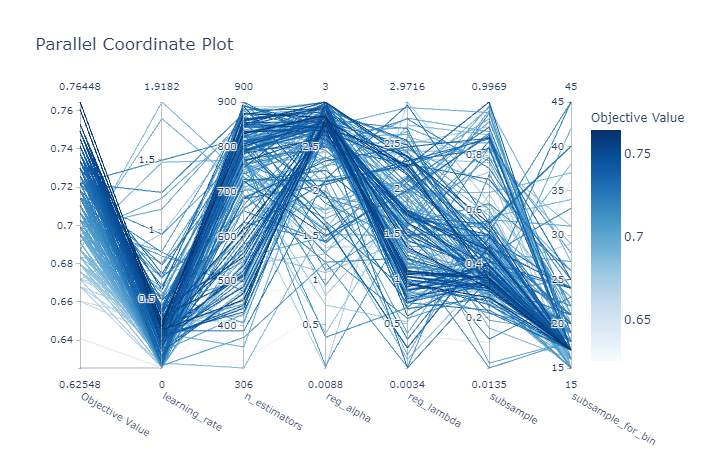

In [53]:
optuna.visualization.plot_parallel_coordinate(study)

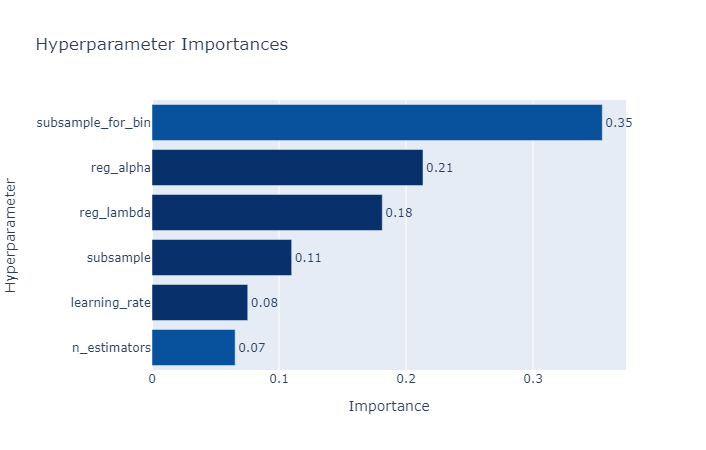

In [54]:
optuna.visualization.plot_param_importances(study)

#### Evaluating the optimized model

In [55]:
best_lgbm = Pipeline(
    [('sc', MinMaxScaler()), 
    ('lgbm', LGBMClassifier(**study.best_params))])

# Cross-Validation
scores = evaluate_model(best_lgbm, x=X_test, y=y_test)
display_scores(scores)

best_lgbm.fit(X_train, y_train)
print('-'*10)
print(classification_report(best_lgbm.predict(X_test), y_test))
print('-'*10)
print(confusion_matrix(best_lgbm.predict(X_test), y_test))

Metric:   accuracy     | Mean: 0.668     | STD: 0.095
Metric:         f1     | Mean: 0.741     | STD: 0.081
Metric:    roc_auc     | Mean: 0.723     | STD: 0.100
Metric:     pr_auc     | Mean: 0.813     | STD: 0.074
----------
              precision    recall  f1-score   support

         0.0       0.59      0.64      0.61        89
         1.0       0.80      0.76      0.78       170

    accuracy                           0.72       259
   macro avg       0.70      0.70      0.70       259
weighted avg       0.73      0.72      0.72       259

----------
[[ 57  32]
 [ 40 130]]


### 5.3 Optimizing SVM

In [56]:
def objective(trial, scaler, metric, cv=5):   
    # Hyperparameters space #
    C = trial.suggest_loguniform('C', 0.01, 1)
    kernel = trial.suggest_categorical('kernel', ['rbf', 'sigmoid'])
    gamma = trial.suggest_loguniform('gamma', 0.01, 1)
    ########################
#     if kernel == 'linear':
#         pipeline = Pipeline([
#             ('sc', StandardScaler()),
#             ('clf', SVC(C=C, 
#                         kernel=kernel, 
#                         probability=True))])
#     else:
    pipeline = Pipeline([
        ('sc', scaler),
        ('clf', SVC(C=C, 
                    kernel=kernel, 
                    gamma=gamma))
    ])
    pipeline.fit(X_train, y_train)
    return pipeline.score(X_test, y_test)
            
#     return cross_val_score(pipeline, X_train, y_train,
#                            cv=cv, n_jobs=-1,
#                             scoring=metric).mean()

if 'study_svm_acc_trans.pkl' in os.listdir():
    study = joblib.load('study_svm_acc_trans.pkl')
else:
    print("Running...")
    scaler = StandardScaler()
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=SEED)
    study = optuna.create_study(direction='maximize')

    study.optimize(lambda trial: objective(trial, 
                                           scaler,
                                           accuracy_metric,
                                           cv=cv), n_trials=200)

trial = study.best_trial
print('Done')
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))
# Save the study for later
# joblib.dump(study, 'study_svm_acc_trans.pkl')

Running...
Done
Accuracy: 0.7258687258687259
Best hyperparameters: {'C': 0.2514051917529072, 'kernel': 'sigmoid', 'gamma': 0.031037718380646635}


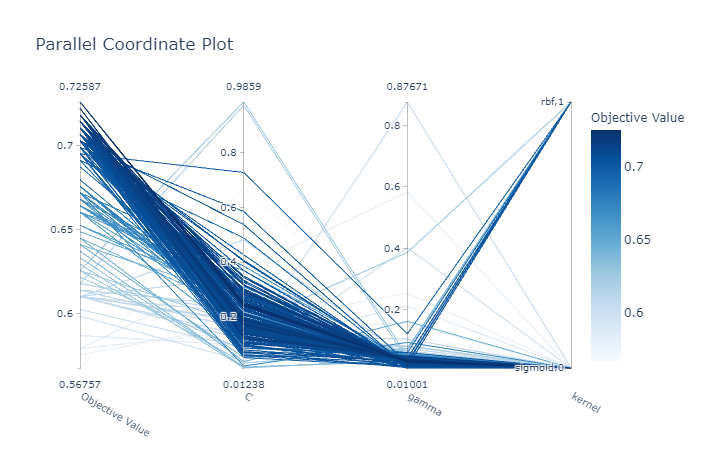

In [57]:
optuna.visualization.plot_parallel_coordinate(study)

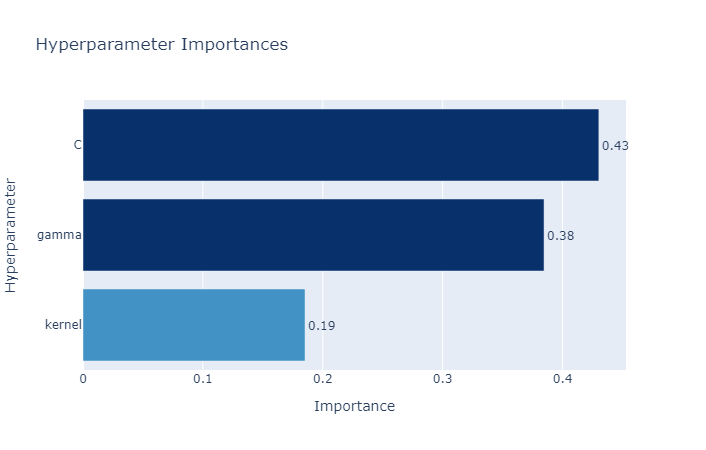

In [58]:
optuna.visualization.plot_param_importances(study)

#### Evaluating the optimized model

In [59]:
best_svm = Pipeline(
    [('sc', StandardScaler()), 
    ('svm', SVC(**study.best_params, probability=True))])

# Cross-Validation
scores = evaluate_model(best_svm, x=X_test, y=y_test)
display_scores(scores)

best_svm.fit(X_train, y_train)
print('-'*10)
print(classification_report(best_svm.predict(X_test), y_test))
print('-'*10)
print(confusion_matrix(best_svm.predict(X_test), y_test))

Metric:   accuracy     | Mean: 0.684     | STD: 0.088
Metric:         f1     | Mean: 0.763     | STD: 0.079
Metric:    roc_auc     | Mean: 0.752     | STD: 0.106
Metric:     pr_auc     | Mean: 0.844     | STD: 0.071
----------
              precision    recall  f1-score   support

         0.0       0.51      0.68      0.58        72
         1.0       0.86      0.74      0.80       187

    accuracy                           0.73       259
   macro avg       0.68      0.71      0.69       259
weighted avg       0.76      0.73      0.74       259

----------
[[ 49  23]
 [ 48 139]]


In [60]:
best_svm.score(X_test, y_test)

0.7258687258687259

### 5.4 Optimizing Logistic Regresion

In [ ]:
def objective(trial, scaler, metric, cv=5):   
    # Hyperparameters space #
    solver = trial.suggest_categorical('solver', ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])
#     n_components = trial.suggest_int('n_components', 1, 15)
    if solver in ['sag', 'newton-cg']:
        penalty = trial.suggest_categorical('penalty', ['l2', 'none'])
        pipeline = Pipeline([('sc', scaler), 
#                              ('pca', PCA(n_components=n_components)),
                             ('clf', LogisticRegression(solver=solver, 
                                                        penalty=penalty))])
    else:
        C = trial.suggest_uniform('C', 0.01, 1)
        pipeline = Pipeline([('sc', scaler),
#                              ('pca', PCA(n_components=n_components)),
                             ('clf', LogisticRegression(C=C,
                                                        solver=solver,
                                                        penalty='l2'))
                            ])
        
    pipeline.fit(X_train, y_train)
    return pipeline.score(X_test, y_test)
    #     return cross_val_score(pipeline, X_train, y_train,
#                            cv=cv, n_jobs=-1,
#                            scoring=metric).mean()

if 'study_lr_acc_trans.pkl' in os.listdir():
    study = joblib.load('study_lr_acc_trans.pkl')
else:
    print("Running...")
    scaler = MinMaxScaler()
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=SEED)
    study = optuna.create_study(direction='maximize')

    study.optimize(lambda trial: objective(trial, 
                                           scaler,
                                           accuracy_metric,
                                           cv=cv), n_trials=1000)

trial = study.best_trial
print('Done.')
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))
# Save the study for later
# joblib.dump(study, 'study_lr_acc_trans.pkl')

Running...


In [ ]:
optuna.visualization.plot_parallel_coordinate(study)

#### Evaluating the optimized model

In [ ]:
param = study.best_params.copy()
best_lr = Pipeline(
    [('sc', MinMaxScaler()),
#      ('pca', PCA(param.pop('n_components'))),
    ('lr', LogisticRegression(**param))])

# Cross-Validation
scores = evaluate_model(best_lr, x=X_test, y=y_test)
display_scores(scores)

best_lr.fit(X_train, y_train)
print('-'*10)
print(classification_report(best_lr.predict(X_test), y_test))
print('-'*10)
print(confusion_matrix(best_lr.predict(X_test), y_test))